In [1]:
# read the data -- from https://www.kaggle.com/saurabh00007/diabetescsv/data
import pandas as pd

df = pd.read_csv('diabetes.csv')
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [2]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [3]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

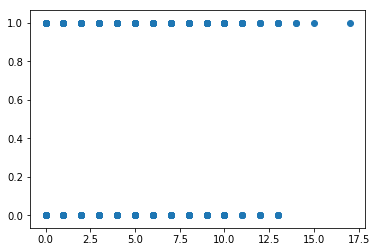

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X['Pregnancies'], Y)
plt.show()

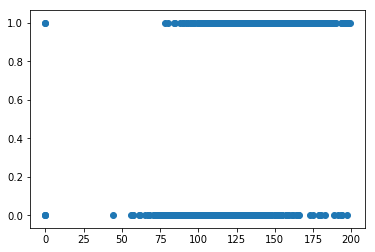

In [8]:
plt.scatter(X['Glucose'], Y)
plt.show()

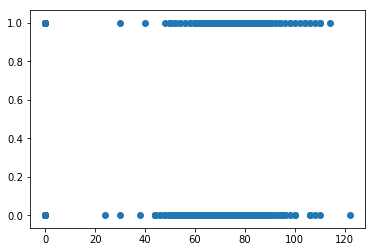

In [9]:
plt.scatter(X['BloodPressure'], Y)
plt.show()

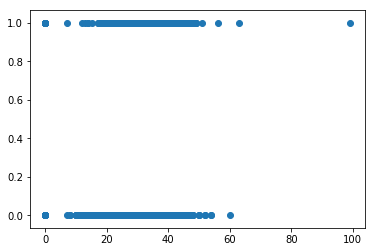

In [10]:
plt.scatter(X['SkinThickness'], Y)
plt.show()

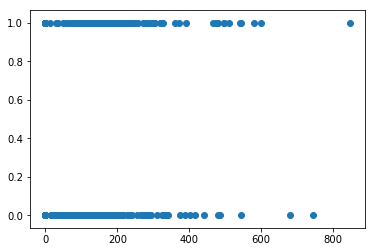

In [11]:
plt.scatter(X['Insulin'], Y)
plt.show()

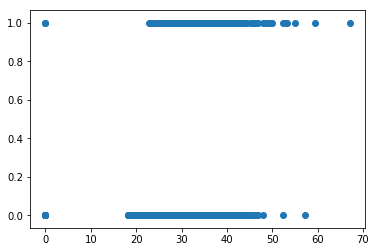

In [12]:
plt.scatter(X['BMI'], Y)
plt.show()

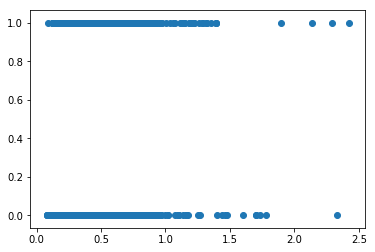

In [13]:
plt.scatter(X['DiabetesPedigreeFunction'], Y)
plt.show()

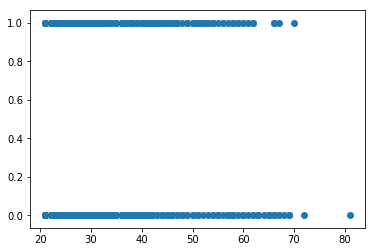

In [14]:
plt.scatter(X['Age'], Y)
plt.show()

In [15]:
# train test split
from sklearn.model_selection import train_test_split

seed = 7
test_size = 0.2
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [32]:
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

In [38]:
for strategy in ['mean', 'median', 'most_frequent']:
    parameters = {'criterion': ('gini', 'entropy'), 'max_features': ['sqrt', 'log2', None, 1, 2, 3, 4, 5, 6, 7, 8, 'auto'], 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    imputer = Imputer(missing_values='NaN', strategy = strategy, axis=0)
    train_x_imputed = imputer.fit_transform(train_x)
    test_x_imputed = imputer.fit_transform(test_x)
    
    rfc = RandomForestClassifier()
    clf = GridSearchCV(rfc, parameters, cv=5)
    clf.fit(train_x_imputed, train_y)
    hyp = clf.predict(test_x_imputed)
    print ('Accuracy: %0.4f' % (accuracy_score(test_y, hyp)))
    print (clf.best_estimator_)
    print ('Best score', clf.best_score_)
    print ('\n')

Accuracy: 0.7727
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Best score 0.760586319218


Accuracy: 0.7532
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=7, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Best score 0.755700325733


Accuracy: 0.8182
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=5, max_leaf_node

In [44]:
parameters = {'boosters': ('gbtree', 'gblinear')}
rfc = XGBClassifier()
clf = GridSearchCV(rfc, parameters, cv=5)
print ('Optional parameters', clf.estimator.get_params().keys())

Best score dict_keys(['base_score', 'colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'nthread', 'objective', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample'])


In [49]:
for strategy in ['mean', 'median', 'most_frequent']:
    #parameters = {'boosters': ('gbtree', 'gblinear')}
    parameters = {'learning_rate': (.1, .2, .3, .4, .5, .6, .7, .8, .9, 1)}
    imputer = Imputer(missing_values='NaN', strategy = strategy, axis=0)
    train_x_imputed = imputer.fit_transform(train_x)
    test_x_imputed = imputer.fit_transform(test_x)
    
    rfc = XGBClassifier()
    clf = GridSearchCV(rfc, parameters, cv=5)
    clf.fit(train_x_imputed, train_y)
    hyp = clf.predict(test_x_imputed)
    print ('Accuracy: %0.4f' % (accuracy_score(test_y, hyp)))
    print (clf.best_estimator_)
    print ('Best score', clf.best_score_)
    print ('\n')

Accuracy: 0.7922
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Best score 0.749185667752


Accuracy: 0.7922
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Best score 0.749185667752


Accuracy: 0.7922
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='bin

### 以下内容仍为课堂笔记和自己记录

In [27]:
# impute missing values
# strategy也可以是median或者mean
# 补齐缺失值，提升Accuracy，如果没有这一步，Accuracy只有70%多
# 有关axis参数的解释，参见imputer的sklearn链接：http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
# If axis=0, then impute along columns. If axis=1, then impute along rows.
# 一般肯定是按列取mean、median或者most frequent来补齐Missing value了，肯定不会按行
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN', strategy = 'most_frequent', axis=0)
train_x_imputed = imputer.fit_transform(train_x)
test_x_imputed = imputer.fit_transform(test_x)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf.fit(train_x_imputed, train_y)
hyp = clf.predict(test_x_imputed)
print ('Accuracy: %0.4f' % (accuracy_score(test_y, hyp)))

Accuracy: 0.7532


In [24]:
# install xgboost, very popular on Kaggle!!!
# conda install -c conda-forge xgboost
# 但是对于Win-64 Anaconda-3的user来说，安装xgboost需要用下述命令conda install -c anaconda py-xgboost
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(train_x_imputed, train_y)
hyp = clf.predict(test_x_imputed)
print ('Accuracy: %0.4f' % (accuracy_score(test_y, hyp)))

Accuracy: 0.8117
